# PAC 2 - M2.959 - Visualització de dades, UOC
### Autor: "Carlos Romero Matarin"


## Stacked Bar Graphs (Gràfics de Barres Apilades)

### Història i Descripció:

Els gràfics de barres apilades són una evolució dels gràfics de barres convencionals, ideats per mostrar múltiples variables numèriques acumulatives en una sola visualització. Aquest tipus de gràfics és extremadament útil per analitzar la composició de diferents categories sobre un total acumulat, permetent als usuaris comparar fàcilment la magnitud i la proporció relativa de cada segment en diferents períodes o entre diferents ítems. La seva capacitat per desglossar una quantitat total en components categòrics els fa especialment valorats en àmbits com l'anàlisi financera, estudis demogràfics, i la gestió de recursos.

<https://www.atlassian.com/data/charts/stacked-bar-chart-complete-guide#:~:text=The%20stacked%20bar%20chart%20(aka,of%20the%20second%20categorical%20variable.>

### Tipus de Dades:

Quantitatives: Aquests gràfics són ideals per visualitzar dades quantitatives que sumen un total significatiu, com vendes totals per producte amb desglossament per regió.

-Categòriques: Cada barra pot ser dividida en segments que representen -categories diferenciades, com tipus de producte o grup d'edat.

###Aspectes Tècnics:

-És crucial que la suma de totes les categories en una barra individual tingui un significat complet i coherent. -L'ús de diferents colors o tonalitats ajuda a distingir clarament entre les categories representades en cada segment de la barra.

Datos: <https://www.ree.es/es/datos/generacion/*no*-renovables-detalle-emisiones-CO2>

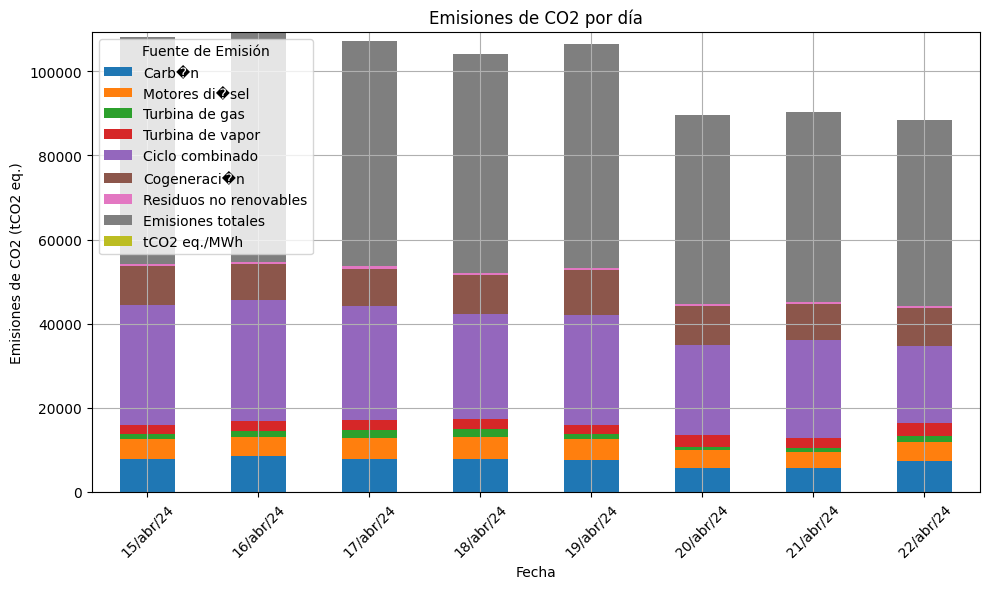

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import mpld3

# Cargar los datos desde el archivo CSV especificando el separador y que las fechas son las columnas
datos = pd.read_csv('/content/no-renovables-detalle-emisiones-CO2_15-04-2024_22-04-2024.csv', encoding='utf-8', decimal=',', header=0)
# Eliminar filas y columnas vacías
datos = datos.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Transponer los datos para que las fechas estén en las columnas
datos = datos.T

# Ahora convertimos la primera fila en la cabecera
new_header = datos.iloc[0]  # Seleccionamos la primera fila para ser el nuevo encabezado
datos = datos[1:]  # Tomamos los datos menos la primera fila
datos.columns = new_header  # Establecemos la primera fila como cabecera

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
datos.plot(kind='bar', stacked=True, ax=ax)

# Configurar las etiquetas y título del gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Emisiones de CO2 (tCO2 eq.)')
ax.set_title('Emisiones de CO2 por día')
ax.legend(title='Fuente de Emisión')
ax.grid(True)
ax.set_xticklabels(datos.index, rotation=45)
plt.tight_layout()

# Convertir el gráfico a HTML usando mpld3
html_str = mpld3.fig_to_html(fig)
html_file = open("emisiones_co2.html", "w")
html_file.write(html_str)
html_file.close()



## Flow Map (Mapa de Flux)

Datos: <https://www.ine.es/jaxiT3/Datos.htm?t=24303#_tabs-mapa>

### Història i Descripció:

Originats al segle XIX i popularitzats per Charles Joseph Minard, els mapes de flux són fonamentals per representar moviments o transferències geogràfiques. Aquests mapes són capaços de mostrar la magnitud i la direcció de fluxos diversos com migracions de població, fluxos comercials, o fins i tot el moviment de dades a través de xarxes. La capacitat d'integrar dades quantitatives amb localitzacions geogràfiques fa que els mapes de flux siguin eines indispensables en la planificació urbana i estudis ambientals.

<https://en.wikipedia.org/wiki/Flow_map>

### Tipus de Dades:

-Geoespacials: Utilitzen coordenades geogràfiques per definir els punts d'origen i destinació. -Quantitatives: El volum dels fluxos és sovint representat per la grossària de les línies o arcs en el mapa.

### Aspectes Tècnics:

-L'escala i la resolució del mapa han de ser adequades per assegurar que tots els fluxos siguin llegibles i no saturin visualment el mapa. -La proporció del gruix de les línies respecte al volum que representen ha de ser constant per garantir una interpretació intuïtiva.


In [68]:
import pandas as pd
import plotly.graph_objects as go

# Cargando los datos
data = pd.read_csv('/content/24295.csv', delimiter=';', encoding='ISO-8859-1')

# Preparar datos para el diagrama de Sankey
source = []
target = []
value = []
unique_countries = {country: idx for idx, country in enumerate(data['País de origen'].unique(), start=1)}
unique_countries['España'] = 0  # España será el destino común para todos los flujos

for _, row in data.iterrows():
    source.append(unique_countries[row['País de origen']])
    target.append(unique_countries['España'])
    if pd.notna(row['Total']):
        if isinstance(row['Total'], float):  # Verificar si el valor es flotante
            # Convertir el valor flotante a cadena de texto y eliminar cualquier punto de miles
            value.append(int(str(row['Total']).replace('.', '')))
        else:
            # Convertir el valor a entero, eliminando cualquier punto de miles
            value.append(int(row['Total'].replace('.', '')))
    else:
        value.append(0)

# Creando el gráfico Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["España"] + list(unique_countries.keys())[:-1],  # Etiquetas de los nodos
    ),
    link=dict(
        source=source,  # Índices de los países de origen
        target=target,  # Índice de España para todos los flujos
        value=value  # Número de personas
    ))])

fig.update_layout(title_text="Flujo de personas hacia España en 2021", font_size=10)
fig.show()

# Guardar el gráfico como un archivo HTML
fig.write_html("flujo_personas_espana_2021.html")


In [66]:
import pandas as pd
import folium

# Coordenadas ampliadas para incluir más países europeos basadas en los datos proporcionados
coordenadas = {
    'España': (40.416775, -3.703790),  # Madrid, España
    'Bélgica': (50.850340, 4.351710),  # Bruselas, Bélgica
    'Bulgaria': (42.697708, 23.321868),  # Sofía, Bulgaria
    'Dinamarca': (55.676098, 12.568337),  # Copenhague, Dinamarca
    'Finlandia': (60.169856, 24.938379),  # Helsinki, Finlandia
    'Francia': (48.856614, 2.352222),  # París, Francia
    'Irlanda': (53.349805, -6.260310),  # Dublín, Irlanda
    'Italia': (41.902784, 12.496366),  # Roma, Italia
    'Países Bajos': (52.367574, 4.904138),  # Ámsterdam, Países Bajos
    'Polonia': (52.229676, 21.012229),  # Varsovia, Polonia
    'Portugal': (38.722252, -9.139337),  # Lisboa, Portugal
    'Alemania': (52.520007, 13.404954),  # Berlín, Alemania
    'Rumanía': (44.426767, 26.102538),  # Bucarest, Rumanía
    'Suecia': (59.329323, 18.068581),  # Estocolmo, Suecia
    'Lituania': (54.687156, 25.279651),  # Vilna, Lituania
    'Reino Unido': (51.507351, -0.127758),  # Londres, Reino Unido
    'Noruega': (59.913869, 10.752245),  # Oslo, Noruega
    'Suiza': (46.204391, 6.143158),  # Ginebra, Suiza
    'Ucrania': (50.450100, 30.523400),  # Kiev, Ucrania
    'Moldavia': (47.411631, 28.369885),  # Chisináu, Moldavia
    'Rusia': (55.755826, 37.617300)  # Moscú, Rusia
}

# Convertir los valores en la columna 'Total' en enteros y eliminar los puntos decimales
data['Total'] = data['Total'].apply(lambda x: int(str(x).replace('.', '')) if pd.notna(x) else 0)


# Crear un mapa centrado en Europa
mapa = folium.Map(location=[50, 10], zoom_start=3)

# Dibujar líneas de flujo de cada país a España con grosor proporcional al número de personas
max_flow = data['Total'].max()  # El flujo máximo para normalizar el grosor

for _, row in data.iterrows():
    pais_origen = row['País de origen']
    personas = int(str(row['Total']).replace('.', '')) if pd.notna(row['Total']) else 0
    if pais_origen in coordenadas:
        # Calcular el peso proporcional del flujo
        weight = (personas / max_flow) * 10  # Escalar por un factor para visualización
        # Dibujar una línea del país a España
        linea = folium.PolyLine(locations=[coordenadas[pais_origen], coordenadas['España']],
                                weight=weight, color='blue')
        mapa.add_child(linea)

        # Agregar marcadores para los países
        folium.Marker(coordenadas[pais_origen], popup=f'{pais_origen}: {personas}').add_to(mapa)

# Agregar marcador para España
folium.Marker(coordenadas['España'], popup='España', icon=folium.Icon(color='red')).add_to(mapa)

# Mostrar el mapa
mapa.save('Flujos_a_Espana_Volumen.html')
mapa


In [67]:
import pandas as pd
import folium
from branca.colormap import LinearColormap

# Coordenadas ampliadas para incluir más países europeos basadas en los datos proporcionados
coordenadas = {
    'España': (40.416775, -3.703790),  # Madrid, España
    'Bélgica': (50.850340, 4.351710),  # Bruselas, Bélgica
    'Bulgaria': (42.697708, 23.321868),  # Sofía, Bulgaria
    'Dinamarca': (55.676098, 12.568337),  # Copenhague, Dinamarca
    'Finlandia': (60.169856, 24.938379),  # Helsinki, Finlandia
    'Francia': (48.856614, 2.352222),  # París, Francia
    'Irlanda': (53.349805, -6.260310),  # Dublín, Irlanda
    'Italia': (41.902784, 12.496366),  # Roma, Italia
    'Países Bajos': (52.367574, 4.904138),  # Ámsterdam, Países Bajos
    'Polonia': (52.229676, 21.012229),  # Varsovia, Polonia
    'Portugal': (38.722252, -9.139337),  # Lisboa, Portugal
    'Alemania': (52.520007, 13.404954),  # Berlín, Alemania
    'Rumanía': (44.426767, 26.102538),  # Bucarest, Rumanía
    'Suecia': (59.329323, 18.068581),  # Estocolmo, Suecia
    'Lituania': (54.687156, 25.279651),  # Vilna, Lituania
    'Reino Unido': (51.507351, -0.127758),  # Londres, Reino Unido
    'Noruega': (59.913869, 10.752245),  # Oslo, Noruega
    'Suiza': (46.204391, 6.143158),  # Ginebra, Suiza
    'Ucrania': (50.450100, 30.523400),  # Kiev, Ucrania
    'Moldavia': (47.411631, 28.369885),  # Chisináu, Moldavia
    'Rusia': (55.755826, 37.617300)  # Moscú, Rusia
}

# Crear un mapa centrado en Europa
mapa = folium.Map(location=[50, 10], zoom_start=3)

# Convertir los valores en la columna 'Total' en enteros y eliminar los puntos decimales
data['Total'] = data['Total'].apply(lambda x: int(str(x).replace('.', '')) if pd.notna(x) else 0)

# Definir una escala de colores para las líneas de flujo
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=data['Total'].min(), vmax=data['Total'].max())

# Dibujar líneas de flujo de cada país a España con grosor proporcional al número de personas
for _, row in data.iterrows():
    pais_origen = row['País de origen']
    personas = row['Total']
    if pais_origen in coordenadas:
        # Calcular el peso proporcional del flujo
        weight = (personas / data['Total'].max()) * 10  # Escalar por un factor para visualización
        # Asignar un color a la línea según la escala de colores
        color = colormap(personas)
        # Dibujar una línea del país a España
        linea = folium.PolyLine(locations=[coordenadas[pais_origen], coordenadas['España']],
                                weight=weight, color=color)
        mapa.add_child(linea)

        # Agregar marcadores para los países
        folium.Marker(coordenadas[pais_origen], popup=f'{pais_origen}: {personas}').add_to(mapa)

# Agregar marcador para España
folium.Marker(coordenadas['España'], popup='España', icon=folium.Icon(color='red')).add_to(mapa)

# Agregar la escala de colores al mapa
colormap.caption = 'Volumen de personas'
mapa.add_child(colormap)

# Guardar el mapa
mapa.save('Flujos_a_Espana_Colores.html')
mapa

## Hyperbolic Trees

### Història i Descripció:

Desenvolupats durant els anys 90, els arbres hiperbòlics són una tècnica de visualització dissenyada per estructurar grans volums de dades en una forma jeràrquica expansiva. Utilitzant una representació geomètrica hiperbòlica, aquests arbres permeten als usuaris navegar de manera eficient a través de nivells complexos d'informació, fent-los extremadament útils per explorar estructures de dades amb moltes branques, com arxius de sistema, organigrames, o classificacions científiques.

<https://en.wikipedia.org/wiki/Hyperbolic_tree>

### Tipus de Dades:

-Jeràrquiques: Ideal per a dades que organitzativament formen una estructura d'arbre, permetent una representació visual de la relació entre elements de diferents nivells.

### Aspectes Tècnics:

-El disseny ha de facilitar una navegació intuitiva, permetent als usuaris expandir i contraure branques de l'arbre per explorar diferents nivells d'informació. -La interacció de l'usuari és essencial, ja que permet explorar activament les diferents capes d'informació contingudes en l'estructura jeràrquica.

Datos: <https://www.kaggle.com/datasets/konivat/tree-of-life>

In [12]:
import pandas as pd

# Assegura't que els fitxers estan en el directori correcte o actualitza les rutes d'arxiu
ruta_a_nodes = '/content/treeoflife_nodes.csv'
ruta_a_enllaços = '/content/treeoflife_links.csv'

# Carrega les dades
df_nodes = pd.read_csv(ruta_a_nodes)
df_enllaços = pd.read_csv(ruta_a_enllaços)

# Selecciona només les columnes que necessitem
df_nodes = df_nodes[['node_id', 'node_name']]
df_enllaços = df_enllaços[['source_node_id', 'target_node_id']]

import networkx as nx

# Crea el graf dirigit a partir dels enllaços
G = nx.from_pandas_edgelist(df_enllaços, 'source_node_id', 'target_node_id', create_using=nx.DiGraph())

# Afegeix els noms dels nodes com a atributs
for index, fila in df_nodes.iterrows():
    if G.has_node(fila['node_id']):
        G.nodes[fila['node_id']]['name'] = fila['node_name']

from pyvis.network import Network

# Crea una xarxa amb pyvis
xarxa = Network(notebook=True)

# Afegeix els nodes i enllaços al graf de pyvis
for node_id, atributs_node in G.nodes(data=True):
    xarxa.add_node(node_id, label=atributs_node.get('name', ''))

# Selecciona un node inicial i final per mostrar un camí
node_inicial = list(G.nodes())[0]  # Posa aquí l'ID del teu node inicial
node_final = list(G.nodes())[-1]  # Posa aquí l'ID del teu node final

# Troba un camí entre els dos nodes (si existeix)
try:
    cami = nx.shortest_path(G, source=node_inicial, target=node_final)
    for i, node_id in enumerate(cami):
        if i < len(cami) - 1:
            xarxa.add_edge(node_id, cami[i+1])
except nx.NetworkXNoPath:
    print("No hi ha cap camí entre els nodes seleccionats.")

# Configura les opcions per una millor visualització
xarxa.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 12
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -80000,
      "centralGravity": 0.3,
      "springLength": 75
    }
  }
}
""")

# Mostra la xarxa
xarxa.show("hyperbolic_tree.html")


hyperbolic_tree.html


In [43]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Assegura't que els fitxers estan en el directori correcte o actualitza les rutes d'arxiu
ruta_a_nodes = '/content/treeoflife_nodes.csv'
ruta_a_enllaços = '/content/treeoflife_links.csv'

# Carrega les dades
df_nodes = pd.read_csv(ruta_a_nodes)
df_enllaços = pd.read_csv(ruta_a_enllaços)

# Selecciona només les columnes que necessitem
df_nodes = df_nodes[['node_id', 'node_name']]
df_enllaços = df_enllaços[['source_node_id', 'target_node_id']]

# Crea el graf dirigit a partir dels enllaços
G = nx.from_pandas_edgelist(df_enllaços, 'source_node_id', 'target_node_id', create_using=nx.DiGraph())

# Afegeix els noms dels nodes com a atributs
for index, fila in df_nodes.iterrows():
    if G.has_node(fila['node_id']):
        G.nodes[fila['node_id']]['name'] = fila['node_name']

# Encuentra el camino más corto desde el nodo 1 hasta el nodo 10
try:
    camino_mas_corto = nx.shortest_path(G, source=1, target=100)
    print("Camino más corto:", camino_mas_corto)

    # Crea un subgrafo con los nodos y aristas del camino más corto
    subgrafo = G.subgraph(camino_mas_corto)

    # Crea una xarxa con pyvis
    xarxa_subgrafo = Network(notebook=True)

    # Añade los nodos y aristas al subgrafo en pyvis
    for node_id, atributs_node in subgrafo.nodes(data=True):
        xarxa_subgrafo.add_node(node_id, label=atributs_node.get('name', ''))
    for source, target in subgrafo.edges():
        xarxa_subgrafo.add_edge(source, target)

    # Mostra la xarxa
    xarxa_subgrafo.show("subgrafo_camino.html")
except nx.NetworkXNoPath:
    print("No hay camino entre los nodos seleccionados.")


Camino más corto: [1, 3, 2372, 2373, 2374, 2458, 2459, 2467, 2468, 2469, 2527, 2528, 8205, 8208, 8210, 8267, 8241, 8243, 8215, 8216, 8221, 8861, 8862, 8863, 8864, 8865, 8875, 29300, 8895, 66, 96, 98, 100]
subgrafo_camino.html


In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")
